<a href="https://colab.research.google.com/github/carmenscar/Mind_lab_data/blob/master/analisecovidbsb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


#Análise dos dados - COVID - Brasília
**ÚLTIMA ATUALIZAÇÃO 01/07/2020**

O Distrito Federal foi um dos entes da federação que começaram cedo com as medidas de isolamento social. 

Passados 3 meses desde o primeiro caso de covid na capital, na primeira semana de março, Brasília tem forte queda nas taxas de isolamento social.

O governo julga seguro a retomada das atividades e está gradativamente liberando a reabertura, com algumas restrições, do comércio essencial, dos parques, dos clubes e das igrejas, deixando por último a reabertura de bares, restaurantes e academias, consideradas atividades não essenciais.

Diante do cenário, analisaremos os dados sobre o **corona vírus** e veremos quais informações podemos extrair dos dados brutos disponibilizados pelo governo do Distrito Federal.

O estudo será atualizado semanalmente.


##Obtenção de dados
Os utilizados na presente análise foram extraídos do [site do GDF](https://covid19.ssp.df.gov.br/extensions/covid19/covid19.html#/) destinado às informações referentes ao **COVID**.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import datetime as dt

%matplotlib inline

In [47]:
df = pd.read_excel('/content/dados-abertos (3).xlsx')

## Dicionário de variáveis
* id - número gerado para identificar o paciente
* Sexo - gênero do paciente
* Faixa etária - faixa de idade do paciente
* Estado de saúde - estado que se encontra o paciente identificado
* Comorbidades - identifica se o paciente possui comorbidades
* RA - Região Administrativa
* Data - data de importação dos dados
* Data Cadastro - data do cadastramento ou atualização dos dados do paciente

Dentre as comorbidades, são identificadas em variáveis separadas: Pneumopatia, Nefropatia, Doença Hematológica, Distúrbios metabólicos, Imunopressão, Obesidade, Cardiovasculopatia e Outros.

### A seguir, observemos um pedaço-resumo do dataframe, analisando as 5 primeiras entradas:

In [48]:
df.head(5)

,id,Data,Data Cadastro,Sexo,Faixa Etária,RA,UF,Estado de Saúde,Comorbidades,Pneumopatia,Nefropatia,Doença Hematológica,Distúrbios Metabólicos,Imunopressão,Obesidade,Outros,Cardiovasculopatia
0,1,2020-07-04,2020-03-18,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Recuperado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020-07-04,2020-03-18,Masculino,50 a 59 anos,Lago Sul,DISTRITO FEDERAL,Recuperado,Sim,Sim,Não,Não,Sim,Não,Não,Não,Não
2,3,2020-07-04,2020-03-18,Masculino,40 a 49 anos,Lago Sul,DISTRITO FEDERAL,Recuperado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,2020-07-04,2020-03-18,Masculino,>= 60 anos,Águas Claras,DISTRITO FEDERAL,Recuperado,Sim,Não,Não,Não,Sim,Não,Não,Não,Sim
4,8,2020-07-04,2020-03-18,Feminino,20 a 29 anos,Plano Piloto,DISTRITO FEDERAL,Recuperado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visão geral dos dados

Os dados possuem 54.057 entradas e 17 variáveis.
Quando observamos os dados da tabela verificamos que existem campos para diferentes comorbidades. 

Para facilitar a análise, criamos uma entrada denominada "Comorbidades" que aponta se há ou não qualquer tipo de comorbidade apresentada pelo paciente, ou se o valor não foi informado.

Todas as variáveis, com exceção das datas, são do tipo "object", ou seja, do tipo string.



In [49]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

display(df.dtypes)

Entradas:	 54057
Variáveis:	 17



id                                 int64
Data                      datetime64[ns]
Data Cadastro             datetime64[ns]
Sexo                              object
Faixa Etária                      object
RA                                object
UF                                object
Estado de Saúde                   object
Comorbidades                      object
Pneumopatia                       object
Nefropatia                        object
Doença Hematológica               object
Distúrbios Metabólicos            object
Imunopressão                      object
Obesidade                         object
Outros                            object
Cardiovasculopatia                object
dtype: object

## Nulls
A maior parte dos valores em branco se relacionam com as informações sobre Comorbidades do paciente. Observa-se que quando há uma comorbidade, as outras comorbidades listadas são, geralmente, preenchidas com "sim" ou "não", e na maioria dos casos(88%), não é informado se há ou não comorbidades.

Uma hipótese é a de que quando registrada uma comorbidade, se avaliam as outras e se não há comorbidade, os valores ficam em branco.

Em relação as informações sobre o estado de saúde do paciente, apesar de não conter valores nulos, a maior parte do valor é dado como "não informado".

In [50]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Doença Hematológica       0.993877
Nefropatia                0.990029
Imunopressão              0.987495
Obesidade                 0.987143
Pneumopatia               0.975840
Distúrbios Metabólicos    0.957378
Cardiovasculopatia        0.938324
Outros                    0.880885
Comorbidades              0.880885
UF                        0.014189
Data Cadastro             0.000906
Estado de Saúde           0.000000
RA                        0.000000
Faixa Etária              0.000000
Sexo                      0.000000
Data                      0.000000
id                        0.000000
dtype: float64

## Análise exploratória dos dados

### Regiões do DF
Ceilândia é a cidade com mais casos de corona vírus, representando 13% dos pacientes diagnosticados. A Região administrativa é seguida em maiores números de casos pelo Plano Piloto,Taguatinga e Samambaia, com aproximadamente 7% dos casos cada.

As regiões do Pôr do Sol, Candangolândia, Sobradinho II,  Arniqueira, Varjão, SIA e Fercal representam os locais com menos casos. 

Observa-se que dado ao fato das regiões estarem predominantemente classificadas como regiões de baixa renda, segundo dados da Codeplan 2018, pode haver subnotificação de casos.

Segundos os dados da Codeplan(2018), as regiões de classificam da seguinte maneira:

• **Grupo 1 (alta renda)**: Plano Piloto, Jardim Botânico, Lago Norte, Lago Sul, Park Way e Sudoeste/Octogonal, com renda domiciliar de R$ 15.622

• **Grupo 2 (média-alta renda)**: Águas Claras, Candangolândia, Cruzeiro, Gama, Guará, Núcleo
Bandeirante, Sobradinho, Sobradinho II, Taguatinga e Vicente Pires, com renda domiciliar média de R$ 7.266;

• **Grupo 3 (média-baixa renda)**: Brazlândia, Ceilândia, Planaltina, Riacho Fundo, Riacho Fundo
II, SIA, Samambaia, Santa Maria e São Sebastião, com renda domiciliar média de R$ 3.101;

• **Grupo 4 (baixa renda)**: Fercal, Itapoã, Paranoá, Recanto das Emas, SCIA–Estrutural e Varjão, com renda domiciliar média de R$
2.472;



In [51]:
df.RA.value_counts() / df.shape[0]


Ceilândia                0.130603
Plano Piloto             0.069982
Taguatinga               0.069445
Samambaia                0.069353
Entorno DF               0.049078
Gama                     0.047838
Outros Estados           0.047191
Não Informado            0.047006
Paranoá                  0.037719
Guará                    0.036942
Águas Claras             0.034852
Sobradinho               0.034630
Santa Maria              0.033076
São Sebastião            0.031781
Planaltina               0.031300
Recanto das Emas         0.028229
Sistema Penitenciário    0.025436
Riacho Fundo             0.019424
Itapoã                   0.015946
Brazlândia               0.013726
Sudoeste/Octogonal       0.013319
Vicente Pires            0.012875
Lago Sul                 0.012024
Riacho Fundo II          0.011969
SCIA                     0.011654
Jardim Botânico          0.011432
Lago Norte               0.008158
Núcleo Bandeirante       0.008010
Cruzeiro                 0.007418
Candangolândia

###Gênero
Em relação ao gênero dos paciêntes com Covid, observa-se que não há diferença de gênero em relação a quantidade de infectados, sendo aproximadamente 52% dos infectadosdo sexo feminino e 48% do sexo masculino, conforme o Gráfico 1.

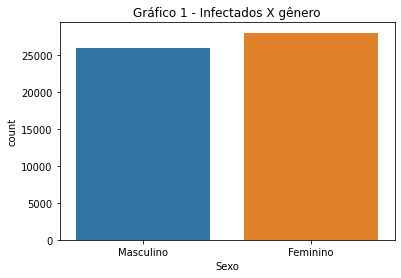

Feminino     0.5191
Masculino    0.4809
Name: Sexo, dtype: float64

In [52]:
sns.countplot(df['Sexo'])
plt.title('Gráfico 1 - Infectados X gênero')
plt.show()
df.Sexo.value_counts() / df.shape[0]

##Faixa Etária
A análise da faixa etária nos demonstra que há menor número de casos notificados entre os menores de 19 anos e maiores de 60 anos. Portanto, o maior número de infecções fica por dentro dessa faixa etária, conforme observado no Gráfico 2.


30 a 39 anos    0.271140
40 a 49 anos    0.224911
20 a 29 anos    0.189763
50 a 59 anos    0.137614
>= 60 anos      0.107535
<= 19 anos      0.069038
Name: Faixa Etária, dtype: float64

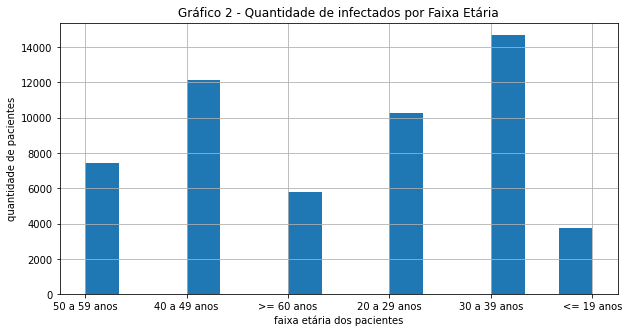

In [53]:

df['Faixa Etária'].hist(bins=15, figsize=(10,5))
plt.xlabel('faixa etária dos pacientes')
plt.ylabel('quantidade de pacientes')
plt.title('Gráfico 2 - Quantidade de infectados por Faixa Etária')
df['Faixa Etária'].value_counts() / df.shape[0]


##Estado de saúde
Analisando o número de óbitos, notamos que este representa aproximadamente 1% dos pacientes. Porém, observa-se que 20% dos pacientes estão com seu estado de saúde não informado, podendo ocorrer subnotificação, conforme evidenciado no Gráfico 3.

Recuperado       0.786633
Não Informado    0.201362
Óbito            0.012006
Name: Estado de Saúde, dtype: float64

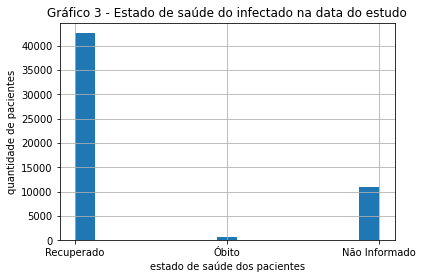

In [54]:
df['Estado de Saúde'].hist(bins=15)
plt.xlabel('estado de saúde dos pacientes')
plt.ylabel('quantidade de pacientes')
plt.title('Gráfico 3 - Estado de saúde do infectado na data do estudo')
df['Estado de Saúde'].value_counts() / df['Estado de Saúde'].shape[0]

##Óbitos
Observa-se que o número de óbitos é maior no sexo masculino, representando 382 óbitos de homens (58%), em 29 de junho.

No gráfico de faixa etária do sexo masculino, há um maior número de homens com idade entre 50 e 59 anos, aproximadamente 15% do total. As mulheres nessa faixa etária representam 10% total, um número menor que o dos homens, o que poderia explicar o número de óbitos maior entre os homens, conforme evidenciado nos Gráficos 4 e 5.

Observa-se também que apesar dos idosos (pacientes > 60 anos) serem apenas 10% dos pacientes totais, estes representam aproximadamente 72% dos óbitos, mostrando que há um **alto risco de mortalidade** nessa faixa etária, conforme evidenciado no Gráfico 6.

In [55]:
df1 = df[df["Estado de Saúde"] == "Óbito"]

In [56]:
df1.Sexo.value_counts()

Masculino    382
Feminino     267
Name: Sexo, dtype: int64

In [57]:
df1.Sexo.value_counts() / df1.Sexo.shape[0]

Masculino    0.588598
Feminino     0.411402
Name: Sexo, dtype: float64

In [58]:
df9 = df1[df1["Sexo"] == "Feminino"]

In [68]:
df9['Faixa Etária'].value_counts() / df9['Faixa Etária'].shape[0]

>= 60 anos      0.779026
50 a 59 anos    0.101124
40 a 49 anos    0.082397
30 a 39 anos    0.026217
20 a 29 anos    0.007491
<= 19 anos      0.003745
Name: Faixa Etária, dtype: float64

In [95]:

df10['Faixa Etária'].value_counts() / df10['Faixa Etária'].shape[0]

>= 60 anos      0.685864
50 a 59 anos    0.159686
40 a 49 anos    0.094241
30 a 39 anos    0.047120
20 a 29 anos    0.010471
<= 19 anos      0.002618
Name: Faixa Etária, dtype: float64

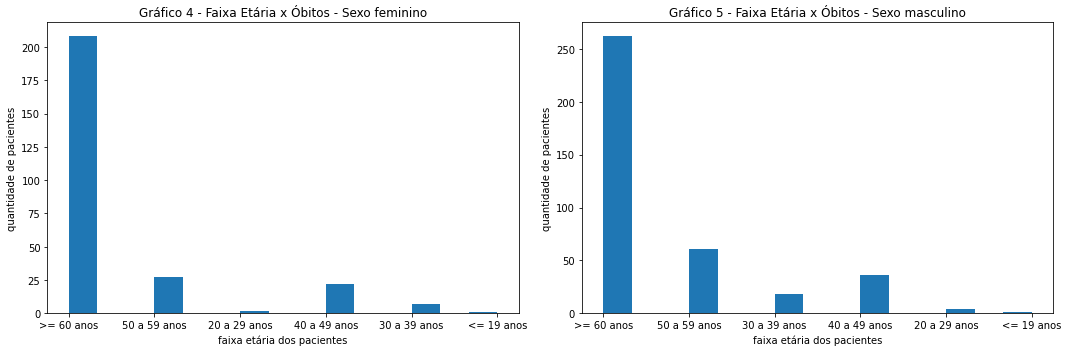

In [96]:
x = df9['Faixa Etária']
y = df10['Faixa Etária']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax1.hist(x, bins = 15)
ax1.tick_params(axis='x', labelrotation=0)
ax1.set_title('Gráfico 4 - Faixa Etária x Óbitos - Sexo feminino')
ax1.set_xlabel("faixa etária dos pacientes")
ax1.set_ylabel("quantidade de pacientes")

ax2.hist(y, bins = 15)
ax2.tick_params(axis='y', labelrotation=0)
ax2.set_title('Gráfico 5 - Faixa Etária x Óbitos - Sexo masculino')
ax2.set_xlabel("faixa etária dos pacientes")
ax2.set_ylabel("quantidade de pacientes")

fig.tight_layout();


>= 60 anos      0.724191
50 a 59 anos    0.135593
40 a 49 anos    0.089368
30 a 39 anos    0.038521
20 a 29 anos    0.009245
<= 19 anos      0.003082
Name: Faixa Etária, dtype: float64

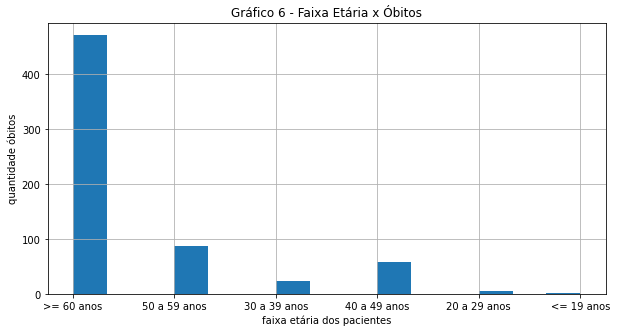

In [97]:
df1['Faixa Etária'].hist(bins=15, figsize=(10,5))
plt.xlabel('faixa etária dos pacientes')
plt.ylabel('quantidade óbitos')
plt.title('Gráfico 6 - Faixa Etária x Óbitos');
df1['Faixa Etária'].value_counts() / df1['Faixa Etária'].shape[0]

##Comorbidades X Óbitos
Em relação aos óbitos, o Gráfico 7 demonstra que 89% dos pacientes que vieram a falecer possuiam algum tipo de comorbidade.

A análise ainda mostra que a maioria sofria das comorbidades do tipo "Distúrbios Metabólicos" e "Cardiovasculopatia",  conforme observado no Gráfico 8.

Cumpre destacar que esses pacientes podiam possuir 1 ou mais tipos de comorbidades.

In [83]:
df2 = df1[df1["Comorbidades"] == "Sim"]

In [103]:
df12 = df1
df12['Comorbidades'].fillna("Não Informado", inplace=True);

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [102]:
df12['Comorbidades'].value_counts()

Sim              583
Não Informado     66
Name: Comorbidades, dtype: int64

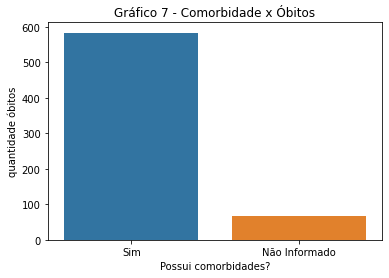

Sim              0.898305
Não Informado    0.101695
Name: Comorbidades, dtype: float64

In [104]:

sns.countplot(df11['Comorbidades'])
plt.xlabel('Possui comorbidades?')
plt.ylabel('quantidade óbitos')
plt.title('Gráfico 7 - Comorbidade x Óbitos')
plt.show();
df12.Comorbidades.value_counts()/df12.Comorbidades.shape[0]


In [105]:
df3 = df2.iloc[:,8:]

In [106]:
df4 = df3.fillna('Não')

In [107]:
df5 = df4.replace(["Sim"], 1)

In [108]:
df6 = df5.replace(["Não"],0 )

In [109]:
df7= df6.drop(columns="Comorbidades")

In [110]:
df7.sum()

Pneumopatia                95
Nefropatia                 56
Doença Hematológica         9
Distúrbios Metabólicos    248
Imunopressão               72
Obesidade                  79
Outros                    108
Cardiovasculopatia        401
dtype: int64

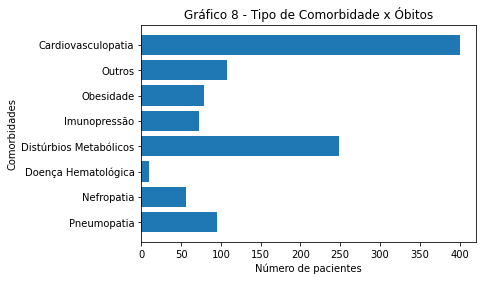

In [111]:
disease = ['Pneumopatia','Nefropatia','Doença Hematológica','Distúrbios Metabólicos','Imunopressão','Obesidade','Outros','Cardiovasculopatia']
n_disease = [95,56,9,248,72,79,108,401]

plt.barh(disease, n_disease);
plt.xlabel('Número de pacientes')
plt.ylabel('Comorbidades')
plt.title('Gráfico 8 - Tipo de Comorbidade x Óbitos');

##Análise temporal

Em relação a quantidade de infectados, a análise dos dados sugere ainda uma tendência de crescimento, concomitante com o crescimento de óbitos, conforme evidenciado nos Gráficos 9 e 10.



In [112]:
df8 = df

In [113]:
df8['Pacientes'] = 1

In [114]:
df8['Mês'] = df8['Data'].dt.month

In [115]:
df8.index = df8['Data Cadastro']

2020-06-29    2851
2020-06-28    2547
2020-06-18    2286
2020-06-16    2158
2020-06-26    1977
              ... 
2020-04-14      10
2020-04-08       8
2020-03-17       1
2020-03-16       1
2020-03-01       1
Name: Data Cadastro, Length: 112, dtype: int64

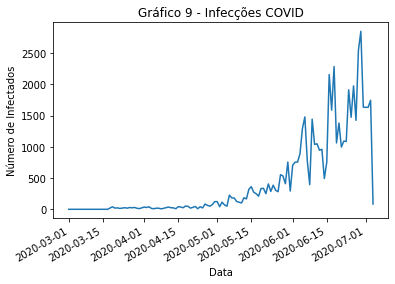

In [116]:
df8['Data Cadastro'].value_counts().plot()
plt.xlabel("Data")
plt.ylabel("Número de Infectados")
plt.title('Gráfico 9 - Infecções COVID')
df8['Data Cadastro'].value_counts() 

2020-06-22    21
2020-06-23    21
2020-06-30    20
2020-06-15    19
2020-06-26    18
              ..
2020-05-12     1
2020-03-28     1
2020-04-16     1
2020-05-01     1
2020-04-13     1
Name: Data Cadastro, Length: 83, dtype: int64

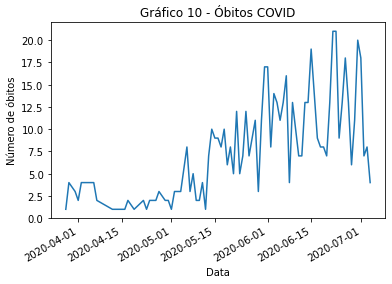

In [117]:
df1['Data Cadastro'].value_counts().plot()
plt.xlabel("Data")
plt.ylabel("Número de óbitos")
plt.title('Gráfico 10 - Óbitos COVID')
df1['Data Cadastro'].value_counts() 



##Conclusões
No recente cenário de pandemia mundial, Brasília também se encontra em número crescente de infectados e óbitos.

Nesse estudo, observamos que o número de óbitos é maior entre os que possuem comorbidades (88%) e apesar do fato de a faixa Etária dos infectados com idade acima de 60 anos representar 10% dos infectados totais, eles representam 72% dos óbitos.

Também observou-se que apesar dos números de infectados serem semelhantes entre homens e mulheres, os homens vão mais a óbito, representando 58% dos falecimentos.

Dentre as comorbidades que estão mais relacionadas com os óbitos estão a Cardiovasculopatia e os Distúrbios Metabólicos.

Nota-se também que há grande quantidade de "Estados de saúde" não informados, aproximadamente 20% dos pacientes, podendo indicar subnotificação.

Este estudo demonstra algumas análises que se pode extrair dos dados brutos abertos disponibilizados pelo Governo do Distrito Federal.

Esse estudo será atualizado semanalmente.

Carmen Scartezini, Accountant & Data Science Student.